<a href="https://colab.research.google.com/github/nousernamesadly/Dataset/blob/main/MillitaryVSothers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/dataset/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/dataset/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/dataset/train/millitary')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/other')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/millitary')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/other')))

5145
6055
1281
1511


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)
# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 8960 images belonging to 2 classes.
Found 2240 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


280/280 ━━━━━━━━━━━━━━━━━━━━ 3867s 14s/step - accuracy: 0.6627 - loss: 0.6477 - val_accuracy: 0.8348 - val_loss: 0.3774
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1401s 5s/step - accuracy: 0.8280 - loss: 0.3928 - val_accuracy: 0.8665 - val_loss: 0.3286
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1409s 5s/step - accuracy: 0.8635 - loss: 0.3232 - val_accuracy: 0.8723 - val_loss: 0.3169
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1419s 5s/step - accuracy: 0.8949 - loss: 0.2388 - val_accuracy: 0.8830 - val_loss: 0.3029
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1477s 5s/step - accuracy: 0.9410 - loss: 0.1504 - val_accuracy: 0.8862 - val_loss: 0.3089
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1462s 5s/step - accuracy: 0.9612 - loss: 0.1077 - val_accuracy: 0.8879 - val_loss: 0.4005
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1431s 5s/step - accuracy: 0.9810 - loss: 0.0661 - val_accuracy: 0.8879 - val_loss: 0.4393
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1466s 5s/step - accuracy: 0.9870 - loss: 0.0438 - val_accura

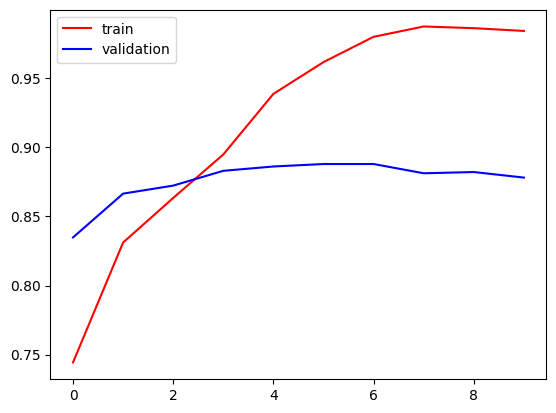

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

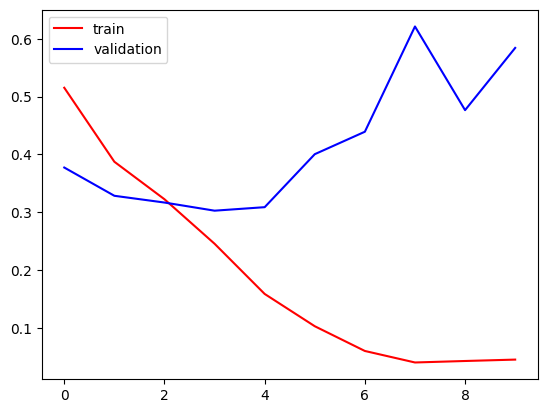

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2792 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

88/88 ━━━━━━━━━━━━━━━━━━━━ 413s 5s/step
[[0.49056122]
 [0.01084393]
 [0.00427231]
 ...
 [0.05110014]
 [0.00724248]
 [0.7700298 ]]


In [ ]:
len(predictions)

2792

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[520 761]
 [624 887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43      1281
           1       0.54      0.59      0.56      1511

    accuracy                           0.50      2792
   macro avg       0.50      0.50      0.50      2792
weighted avg       0.50      0.50      0.50      2792

